In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

from matplotlib import animation

%matplotlib inline

Using TensorFlow backend.


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [3]:
np.random.seed(12)

In [4]:
def function(x):
    return abs(math.sin(x))**(1/2)

In [5]:
X = np.linspace(-4,4,400)
y = np.array(list(map(function,X)))

x_train = np.array([X[i]/4 for i in range(0,len(X),2)])
y_train = np.array([y[i] for i in range(0,len(y),2)])

x_test = np.array([X[i]/4 for i in range(0,len(X),5)])
y_test = np.array([y[i] for i in range(0,len(y),5)])

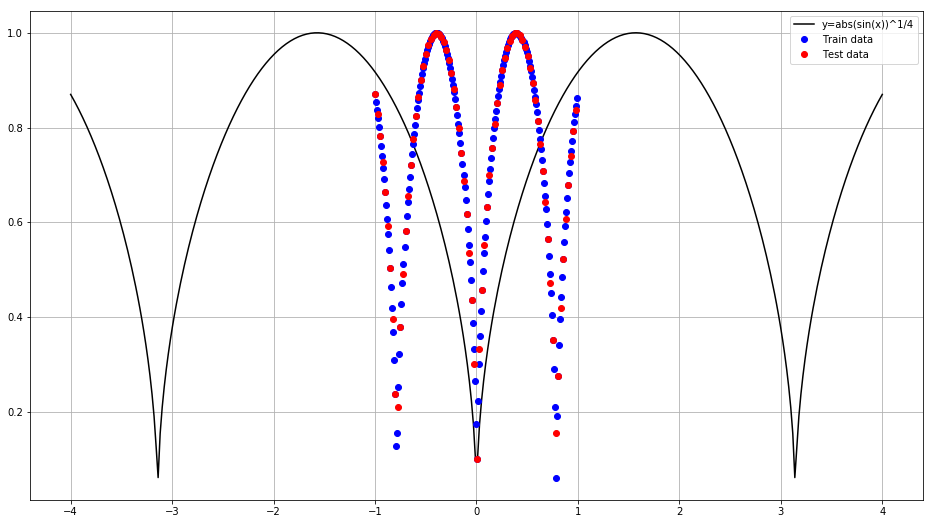

In [6]:
plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
plt.plot(x_train,y_train,'o',color='#0000FF',label='Train data')
plt.plot(x_test,y_test,'o',color='#FF0000',label='Test data', linewidth=6)
plt.grid()
plt.legend()
plt.show()

In [7]:
activation = 'selu'
epochs_number = 20
optimizer = Adam(lr=0.0001)

In [8]:
model = Sequential()

model.add(Dense(20, input_dim=1, activation=activation, kernel_initializer='he_normal'))
model.add(Dense(40, input_dim=1, activation=activation, kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer=optimizer)

In [9]:
loss = {'loss':[], 'val_loss':[]}
learn_predictions = []

for epoch in range(epochs_number): 

    print('Epoch: {0}'.format(epoch*10))

    hist = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=2, validation_data=(x_test,y_test))

    loss['loss'].extend(hist.history['loss'])
    loss['val_loss'].extend(hist.history['val_loss'])
    learn_predictions.append(model.predict(X))

model.save('model {0}.h5'.format('with 2 layers'))    

Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10


InternalError: Blas GEMM launch failed : a.shape=(10, 1), b.shape=(1, 20), m=10, n=20, k=1
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_dense_1_input_0_0/_13, dense_1/kernel/read)]]
	 [[Node: loss/mul/_47 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_639_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'dense_1/MatMul', defined at:
  File "/home/iamlion12/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/iamlion12/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-2b474d9c139d>", line 3, in <module>
    model.add(Dense(20, input_dim=1, activation=activation, kernel_initializer='he_normal'))
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/keras/models.py", line 442, in add
    layer(x)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 602, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/keras/layers/core.py", line 841, in call
    output = K.dot(inputs, self.kernel)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 998, in dot
    out = tf.matmul(x, y)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1844, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1289, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/iamlion12/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(10, 1), b.shape=(1, 20), m=10, n=20, k=1
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_dense_1_input_0_0/_13, dense_1/kernel/read)]]
	 [[Node: loss/mul/_47 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_639_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


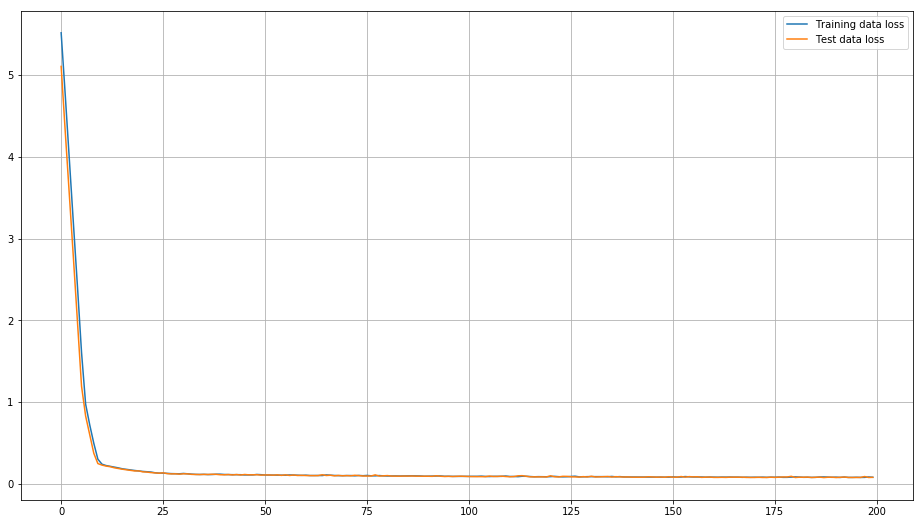

In [64]:
plt.plot(loss['loss'], label='Training data loss')
plt.plot(loss['val_loss'], label='Test data loss')
plt.grid()
plt.legend()
plt.show()

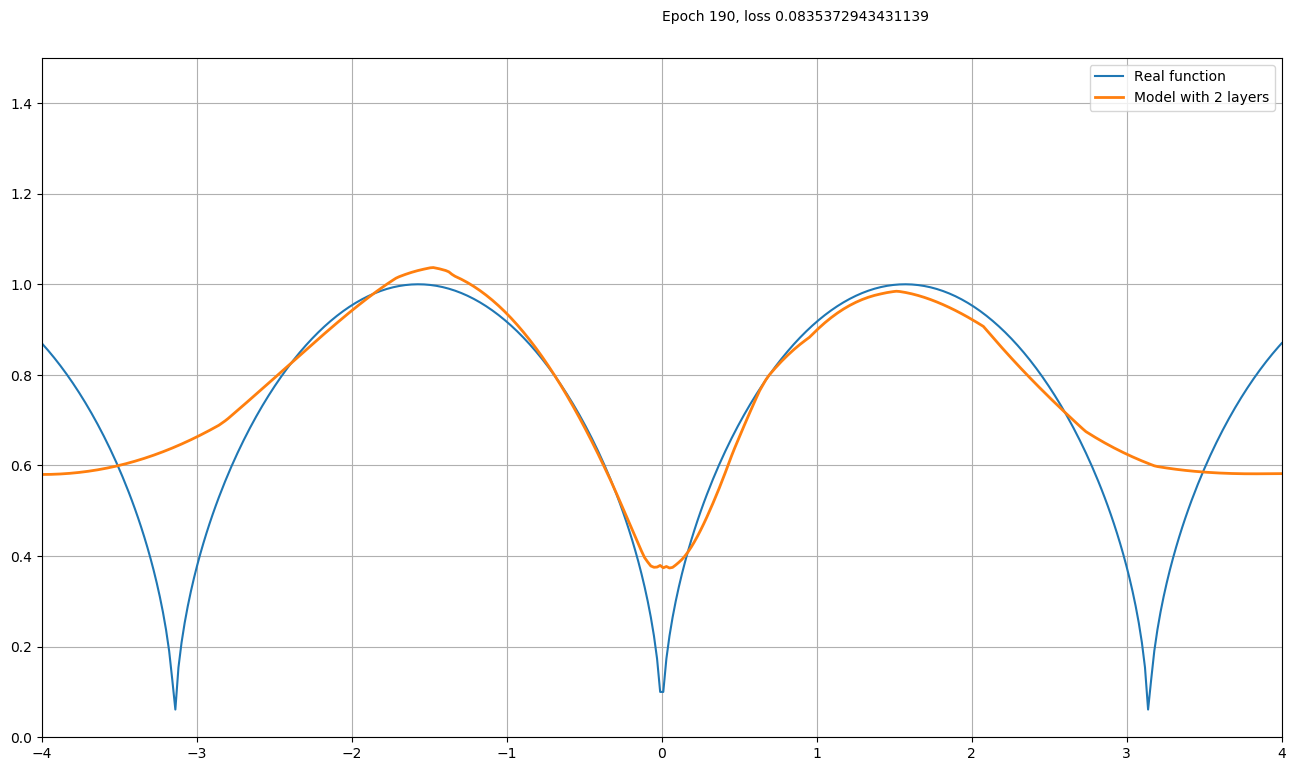

In [65]:
fig = plt.figure(dpi=100)
ax = plt.axes(xlim=(-4, 4), ylim=(0, 1.5))
ax.grid()

ttl = ax.text(0.5, 1.05, '', transform = ax.transAxes, va='bottom')
ax.plot(X, y, label='Real function')
line, = ax.plot([], [], lw=2)
line.set_label('Model with 2 layers')

def init():
    ttl.set_text('')
    line.set_data(X, learn_predictions[0])
    return line, ttl

def animate(i):
    ttl.set_text("Epoch {0}, loss {1}".format(i*10, loss['loss'][i*10]))
    x = X
    y = learn_predictions[i]
    line.set_data(x, y)
    return line, ttl

ax.legend()

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=150, blit=True)

anim.save('Model_with_2_layers.gif', 
          dpi=100, writer='imagemagick')

# Conclusion:
Nice, now NN try to predict my function better